In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


#### 통계적 추정
- 점추정
    -모평균이나 모분산 등의 모수를 하나의 수치로 추정
    - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라
    한다.
    -표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
    - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 일치성이라 하며 일치성을 지닌 추정량을
    일치 추정량이라고 함
    - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
    - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
    - 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은
    $s^2$으로 나타낸다.
    
- 구간추정
    - 모분산을 알고 있는 경우 모평균 구간추정
    - 모분산을 알고 있는 경우의 모분산 구간추정
    - 모분산을 알지 못하는 경우의 모평균 구간추정
    - 베르누이 분포의 모평균의 구간추정
    - 포아송 분포의 모평균의 구간추정

In [15]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores=np.array(df['score'])
scores[:2]

array([76, 55], dtype=int64)

In [16]:
mean = np.mean(scores)
var = np.var(scores)
mean,var

(69.53, 206.6691)

In [17]:
#[과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요

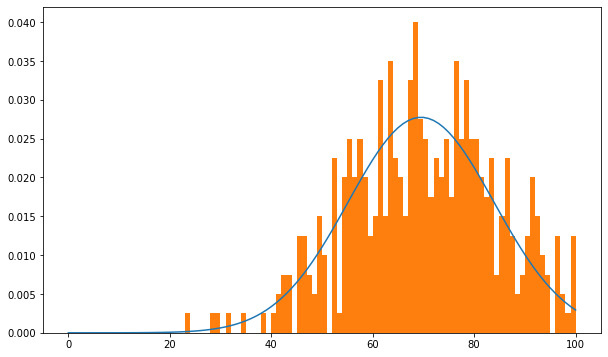

In [18]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.arange(101)
rv=stats.norm(mean,np.sqrt(var))
ax.plot(xs,rv.pdf(xs))
ax.hist(scores, bins = 100,range=(0,100),density=True)
plt.show()

In [19]:
np.random.seed(0)
n=20
sample=np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [20]:
np.random.seed(1111)
n_samples=10000
samples=np.random.choice(scores,(n_samples,n))
samples
xs = np.arange(101)
rv=stats.norm(mean,np.sqrt(var))
ax.plot(xs,rv.pdf(xs))
ax.hist(samples,bins=100,range=(0,100),density=True)
plt.show()

In [21]:
np.mean(np.random.choice(scores,int(1e6)))

69.542954

In [22]:
np.var(np.random.choice(scores,int(1e6)),ddof=1)

207.08336592317

#### 불편성: 기댓값이 추측하기 원하는 모수가 되는 성질
#### 일치성: 표본 크기를 키우면 추측하기 원하는 모수가 되는 성질

In [23]:
#표본 데이터의 평균
s_mean=np.mean(sample)
s_mean

70.4

In [24]:
# 모평균의 분산
p_var= np.var(scores)
p_var

206.6691

In [25]:
u_var = np.var(sample,ddof=1)
u_var

158.25263157894742

In [26]:
# 모분산을 알고 있을 떄 모평균의 신뢰구간 추정
#100번중 95% 비율로 이 값 사이에 들어감

rv= stats.norm()
lc1 = s_mean-rv.isf(0.025) *np.sqrt(p_var/n)
uc1 = s_mean-rv.isf(0.975)* np.sqrt(p_var/n)

lc1,uc1


(64.09956018535247, 76.70043981464754)

In [27]:
#[과제] 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬코드로 수행하세요-> 표준오차사용
rv=stats.t(df=n-1)
lc1 = s_mean-rv.isf(0.025)*np.sqrt(u_var/n)
uc1 = s_mean-rv.isf(0.975)*np.sqrt(u_var/n)

lc1,uc1

(64.51244886603887, 76.28755113396114)

In [28]:
e_df = pd.read_csv('./data/ch10_enquete.csv')
e=np.array(e_df['known'])
n=len(e)
e[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [29]:
s_mean=e.mean()
s_mean

0.709

In [30]:
#베르누이분포의 모평균 신뢰구간 
rv=stats.norm()
lc1 = s_mean-rv.isf(0.025)*np.sqrt(s_mean*(1-s_mean)/n)
uc1 = s_mean-rv.isf(0.975)*np.sqrt(s_mean*(1-s_mean)/n)
lc1,uc1

(0.6808474522924337, 0.7371525477075662)

In [31]:
n_df = pd.read_csv('./data/ch10_access.csv')
n=np.array(n_df['access number'])
k=len(n)
n[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [32]:
s_mean= n.mean()
s_mean

10.444444444444445

In [33]:
#[과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설명하여 모평균 신뢰구간을 구하세요.
rv = stats.norm()
lc1= s_mean-rv.isf(0.025) *np.sqrt(s_mean/n)
uc1 = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lc1, uc1

(array([8.44139918, 8.53461572, 8.33304935, 8.33304935, 8.95146265,
        8.68765753, 7.2773518 , 8.44139918, 8.44139918, 8.20497176,
        8.44139918, 8.53461572, 8.86089812, 8.33304935, 8.61592265,
        8.61592265, 8.05034744, 8.20497176, 8.53461572, 8.05034744,
        8.53461572, 8.44139918, 7.85852413, 8.53461572, 8.05034744,
        8.68765753, 8.75156222, 8.61592265, 8.20497176, 8.20497176,
        8.20497176, 8.53461572, 8.44139918, 8.20497176, 7.85852413,
        8.20497176, 8.53461572, 8.68765753, 8.61592265, 8.05034744,
        8.53461572, 8.33304935, 8.61592265, 8.68765753, 8.75156222,
        8.75156222, 8.61592265, 8.90817886, 8.33304935, 8.61592265,
        8.53461572, 7.85852413, 8.53461572, 8.53461572, 8.53461572,
        8.80896484, 8.33304935, 8.68765753, 7.85852413, 7.85852413,
        8.68765753, 8.33304935, 8.61592265, 8.61592265, 8.44139918,
        8.05034744, 8.68765753, 8.61592265, 7.85852413, 8.53461572,
        8.86089812, 8.44139918]),
 array([12.447

In [34]:
# 1시간당 액세스 수
n_access_df = pd.read_csv('data/ch10_access.csv')
print(len(n_access_df),'\n', n_access_df.head(),'\n')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

s_mean = n_access.mean()
s_mean

rv = stats.norm
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl

72 
    access number
0             10
1             11
2              9
3              9
4             18 



(9.697953549598202, 11.190935339290688)

#통계적 가설검정

In [35]:
 #[과제] A학생의 사례로 가설검정의 프로세스를 정리하세요.
# 검정통계량이 임곗값보다 작으므로 귀무가설을 기각한다.
df = pd.read_csv('./data/ch11_potato.csv')
sample = df.무게

# 검정통계량
s_mean = np.mean(sample)
z = (s_mean - 130) / np.sqrt(9/14)
print(z,'\n')

# 임곗값
rv = stats.norm()
rv.isf(0.95)

-1.932298779026813 



-1.6448536269514722

In [36]:
# p값이 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 
# "모평균은 130g이다"라는 결론이 되는 것은 아니다.
p_value = rv.cdf(z)
p_value

0.026661319523126635

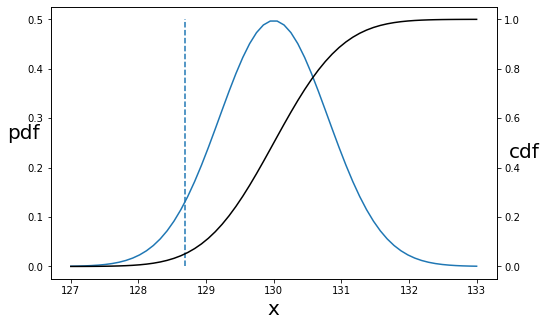

In [44]:
import numpy as np
import matplotlib.pyplot as plt
rv=stats.norm(130,np.sqrt(9/14))
fig=plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
ax2 =ax1.twinx()
xs = np.linspace(127,133,60)
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05),0,0.5,ls='--')
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)
plt.show()

####  Q.감자튀김 무게의 평균이 130g이다. 라는 귀무가설에 대한 유의성 검정을 수행하라(정규분포,분산9)

In [38]:
# 귀무가설 : 감자튀김의 평균무게는 130g이다.
# 대립가설 : 감자튀김의 평균무게는 130g보다 작다.
# 유의 수준은 5%로 설정
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df.무게)
s_mean = sample.mean()
# 표본평균 : A가 산 감자튀김 14개의 평균 무게 = 128.451g
print(s_mean,'\n')
# 임계값 구하기: 퍼센트 포인트  
rv = stats.norm(130, np.sqrt(9/14))
print(rv.isf(0.95),'\n')
# 검정통계량이 임계값보다 작기때문에 귀무가설은 기각된다.


# 표준화 하여 검정통계량과 임계값의 비교

# 표준화 된 검정 통계량 값
z = (s_mean-130)/np.sqrt(9/14)
print(z,'\n')
# 임계값
rv = stats.norm()
print(rv.isf(0.95) , '\n')
# 검정통계량이 임계값보다 작으므로 귀무가설은 기각

# p값을 활용하여 가설검정

print(rv.cdf(z))
# 유의수준인 0.05보다 작으므로 귀무가설 기각

# 따라서 모평균은 130g보다 작다.


128.4507142857143 

128.68118313069039 

-1.932298779026813 

-1.6448536269514722 

0.026661319523126635


In [45]:
# 양측검정
z = (s_mean-130)/np.sqrt(9/14)
z

-1.932298779026813

In [46]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [47]:
#양측 검정의 p값은상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도 함수의 2배로 계산
rv.cdf(z)*2
#유의수준보다 크므로 귀무가설 기각되지 않음, '감자튀김의 무게는 130g'이 아니다라고 말할 수 없다

0.05332263904625327

#### 가설검정에서의 두가지 오류
-  제 1종오류: 귀무가설이 옳을 때 귀무가설을 기각한 오류
    - 실제로 평균이 130g인데도 '모평균은 130g 보다 작다'는 결론을 내리는 상황
-  제 2종오류: 대립가설이 옳을 때 귀무가설을 체택한 오류
    - 모평균은 130g보다 작다인데도 '모평균은 130g 보다 작다'라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

    

In [63]:
rv= stats.norm(130,3)

 $\alpha$ 
  $\beta$

In [64]:
#제 1종 오류를 범할 비율: 위험률, 유의수준(알파), 분석가가 제어할 수 있는 확률
np.random.seed(10)
c =stats.norm().isf(0.95)
n_samples=10000
cnt= 0 
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ =np.mean(sample_)
    z = (s_mean_-130)/np.sqrt(9/14)
    if z< c:
        cnt +=1
cnt/n_samples

0.0522

In [68]:
#[과제] 제 2종 오류를 범할 비율: 1-𝛽,검정력, 분석가가 제어할 수 없는 확률
# 감자튀김 사례로 2종 오류를 범하는 비율을 구하라

In [51]:
#제 2종 오류
rv= stats.norm(128,3)

In [53]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ =np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_-130)/np.sqrt(9/14)
    if z>=c :
        cnt+=1
cnt/n_samples


0.194

정규분포의 모평균에 대한 검정( 모분산을 알고 있음)

In [110]:
#[과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김의 표본 데이터로 실행해보세요
#모분산을 알고 있는 경우 
def pmean_test(sample,mean0,p_var,alpha=0.05):
    s_mean= np.mean(sample)
   
    n= len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean-mean0)/np.sqrt(p_var/n)
    if interval[0] <=z <=interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    if z<0:
        p=rv.cdf(z)*2
    else:
        p =(1-rv.cdf(z))*2
    print(f'p값은{p:.3f}')

In [111]:
pmean_test(sample,130,9)

귀무가설 채택
p값은0.053


In [86]:
#정규분포의 모분산에 대한 검정
def pvar_test(sample,var0,alpha=0.05):
    u_var = np.var(sample,ddof=1)
    n=len(sample)
    rv =stats.chi2(df=n-1)
    interval=rv.interval(1-alpha)
    
    y= (n-1) *u_var / var0 #검정 통계량
    if interval[0] <= y <=interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if y<rv.isf(0.5):
        p=rv.cdf(z)*2
    else:
        p =(1-rv.cdf(y))*2
    print(f'p값은{p:.3f}')

In [87]:
pvar_test(sample,9)

귀무가설 채택
p값은0.085


In [106]:
#정규분포의 모평균에 대한 검정( 모분산을 알지 못함)-t표본사용
def pmean_test(sample,mean0,alpha=0.05):
    s_mean= np.mean(sample)
    u_var =np.var(sample,ddof=1)
    n= len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean-mean0)/np.sqrt(u_var/n)
    if interval[0] <=t <=interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    if t <0:
        p=rv.cdf(t)*2
    else:
        p =(1-rv.cdf(t))*2
    print(f'p값은{p:.3f}')

In [107]:
pmean_test(sample,130)

귀무가설 채택
p값은0.169


In [105]:
from scipy import stats
t,p =stats.ttest_1samp(sample,130)
t,p

(-1.4551960206404198, 0.16933464230414275)

In [ ]:
 #[과제] 대응표본,독립표본에 대하여 정규분포를 가정하는 경우와 가정할 수 없는 경우 4가지 유형의
    #각 사례를 작성하라

In [ ]:
#대응표본
똑같은 집단에서 발생 똑같은 온도 높이는 약을 먹은 후에 체온 
동일한집단에 대해 어떠한 사건이 발생 전 후에 대해 효과가 어떻게 달라지는지

#독립표본
대응표본과 달리 완전히 독립된 ㅈ집단 간에 남자집단과 여자집단의 온도 높이는 약을 먹은 것과 무관하게
발생하는 체온차이 

In [ ]:
#대응비교 t검정 독립비교 t검정 윌콕슨의 부호순위 검정 만 위트니의 u검정에 대응하는 실사례 
#대응비교 t검정이란 대응하는 데이터가 있고 데이터 차이에 정규분포를 가정할 수 있는 경우
- 최근 a학생의 학급에서는 근력운동을 하면 집중력이 향상된다는 이야기가 있었고, A학생은 근력운동이
 정말 효과있는지 보려고 학급 20명에게 근력운동을 시킴. 운동전후 집중력 차이가 있는지
* 같은 집단의 어떠한 사건 전 후의 차이가 나는 것
- ex) 같은 시간에 수영을 하는 아침반 참여 사람들이 수영을 한달 한 뒤 체중의 변화가 있는지
#독립비교 T검정이란 대응하는 데이터가 없고 독립된 2표본 모집단에 정규분포를 가정할 수 있는 경우
# 평균값의 차이에 대한 검정
 ex) A학급은 인문계열 집단인데 B학급 학생들은 체육계열 학생들이라 평소에도 근력운동 하고 있었음
    그래서 차이가 나지 않을까 테스트 해봄 -> 모집단이 다르고 같은 사건의 전 후 비교
ex2) 아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 오후반 사람들은 수영을 한달 한 뒤
비교해서 체중의 변화가 있는지
#윌콕슨의 부호순위 검정 : 대응표본에서 차이에 정규분포를 가정할 수 없는 경우, 중앙값의 차이에 대한 검정
ex)대응표본이므로 전후 차이에 주목, 절댓값이 작은 것 부터 순서대로 순위 부여 scipy.stats의 rankdata함수사용
차이의 부호가 마이너스인 것의 순위합과 부호가 플러스인 것의 순위합을 각각 구한다. 모집단이 정규분포를
따르는 경우에도 사용가능하지만 t검정에 비해 검정력이 낮다.
- 포아송/이항/베르누이/기하 
- 페북사이트에 평균 1시간당 방문 횟수가 2번이라 할 때, 1시간에 3번 방문이 될 확률은?


#정규분포를 가정
#### 대응표본 t검정- ex)같은 시간에 수영을 하는 아침반 사람들이 수영을 한 달 한 뒤 체중의 변화가 있었는지
#### 독립표본 t검정- ex) 아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 수영을 한 달 한뒤 두 반의
 #### 체중변화가 있는지를 검정
#정규분포를 가정할 수 없는 경우
#대응표본- 윌콕슨의 부호순위검정
#독립표본- 만 위트니의 u검정


In [116]:
data =pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후']-data['전']
print(data.shape,'\n',data.head())

(20, 3) 
     전   후  gap
0  59  41  -18
1  52  63   11
2  55  68   13
3  61  59   -2
4  59  84   25


In [117]:
t,p =stats.ttest_1samp(data['gap'],0)
t,p

(2.204154108716127, 0.04004419061842953)

In [118]:
t,p =stats.ttest_rel(data['후'],data['전'])
p
# 귀무가설 기각, -> 근력운동이 집중력에 영향을 안미친다고 할 수 없다 

0.04004419061842953

In [121]:
#독립비교 t검정
train= pd.read_csv('./data/ch11_training_ind.csv')
train.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [122]:
t,p =stats.ttest_ind(train['A'],train['B'],equal_var=False) #ind 인디팬던트 독립의 약자
p
#유의수준보다 커서 귀무가설 채택,A학급과 B학급 사이에 유의한 차이가 있다고 말할 수 없다

0.08695731107259361

In [140]:
#[과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정 수행
#윌콕슨의 부호순위 검정 : 정규분포를 가정할 수 없는 경우, 중앙값의 차이에 대한 검정
data =pd.read_csv('./data/ch11_training_rel.csv')
data2= data[:6].copy()
data2

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84
5,45,37


In [141]:
diff = data2['후']-data2['전']
data2['차']=diff
data2

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25
5,45,37,-8


In [142]:
rank= stats.rankdata(abs(diff)).astype(int)
data2['rank'] =rank
data2

,전,후,차,rank
0,59,41,-18,5
1,52,63,11,3
2,55,68,13,4
3,61,59,-2,1
4,59,84,25,6
5,45,37,-8,2


In [133]:
#그 차이의 부호가 마이너스인 순위합과 차이가 플러스인 순위합 구하기
# 마이너스,플러스 중에 작은 쪽이 검정통계량
#검정통계량이 임곗값보다 작은 경우 귀무가설 기각
r_minus =np.sum((diff<0)*rank)
r_plus = np.sum((diff>0)*rank)
r_minus,r_plus

(8, 13)

In [137]:
T,p =stats.wilcoxon(data['전'],data['후'])
p

0.03623390197753906

In [139]:
T,p =stats.wilcoxon(data['후'],data['전'])
p

0.039989471435546875

#[과제]독립성 검정이 필요한 사례 2가지를 작성하세요  

 - 모집단의 표본의 갯수가 다를 때, 두 모집단의 중앙값이 동일한지 여부를 검정(만 위트니 u검정)
 - 모집단이 정규성을 만족하지 못할 때 사용(윌콕슨의 부호순위 검정)

In [7]:
ad_df = pd.read_csv('./data/ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [164]:
#p값이 0,05보다 크므로 귀무가설 채택하며 광고 A와 광고 B에 유의미한 차이가 인정되지 않는다
chi2,p,dof,ef = stats.chi2_contingency(ad_cross,correction=False)
chi2,p,dof

(3.75, 0.052807511416113395, 1)

In [8]:
#교차집계표
ad_cross = pd.crosstab(ad_df['광고'],ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [9]:
ad_cross['했다']/(ad_cross['했다']+ ad_cross['하지 않았다'])


광고
A    0.1225
B    0.0850
dtype: float64

In [ ]:
# [과제] 기대도수와 관측도수(실측)의 차이(검정통계량)를 측정해서 검정 수행(chi2값)

In [165]:
n_not,n_yes = ad_cross.sum()
n_not,n_yes

(900, 100)

In [10]:
chi2,p,dof,ef=stats.chi2_contingency(ad_cross,correction=False)
chi2,p,dof

(3.75, 0.052807511416113395, 1)